In [427]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Format mẫu
- Câu 1: Ứng với một thời gian cho trước, hãy rút trích đặc trưng cho mẫu….
Tổ chức thành chương trình con 
- Câu 2: Viết chương trình chuẩn bị bộ dữ liệu M hàng và N cột, trong đó Các cột là các đặc trưng như sau:
- Câu 3: Chia dữ liệu thành tập train/val/ test theo quy tắc …..
- Câu 4: Các đặc trưng sẽ được xử lý theo quy tắc …. . Hãy xây dựng chương trình định nghĩa đối tượng CoumnTransfor để thực hiện viẹc tiền xử lý dữ liệu
- Câu 5: Thực hiện phân loại với Pipeline định nghĩa như sau. Hãy xác định những tham số điều khiển nào cần tinh chỉnh
- Câu 6: Huấn luyện và lựa chọn mô hình tốt nhất bằng Grid search từ dữ liệu train / val
- Câu 7: Đánh giá mô hình dựa vào dữ liệu test
## Đề mẫu
- Câu 1: Cho thời điểm t (tính theo đơn vị giờ), hãy truy vấn các dữ liệu trong khoảng thời gian từ t - T đến t, trong đó T là giá trị đã biết, tính bằng giờ.
- Câu 2: Giả sử M là số thời điểm (t) có thể lấy được trong bộ dữ liệu và N là số dịch vụ, hãy tạo một ma trận có kích thước M * (4 * N) chứa các đặc trưng đã rút trích ở câu 5 cho mỗi dịch vụ: 
    5. Rút Trích Các Đặc Trưng Từ Mỗi Nhóm
    Với mỗi nhóm dịch vụ, rút trích các đặc trưng sau:
    
    a. Tổng số lần gọi (Total Calls)
    
    b. Tổng số lần gọi thành công (Successful Calls)
    
    c. Trị trung bình thời gian thực thi (Average Execution Time)
    
    d. Trị trung bình dữ liệu sử dụng (Average Data Usage)
    
    datetime chia hour và day

- Câu 3: Chia dữ liệu thành tập train/val/ test theo quy tắc (nếu dự đoán phải dùng time series split, ngược lại train test split). Từ việc xây dựng chương trình định nghĩa đối tượng CoumnTransfor để thực hiện viẹc tiền xử lý dữ liệu với việc embeding hour theo (x,y, hình tròn để tìm khoảng cách) còn day sẽ dùng one hot encoder 

- Câu 5: Thực hiện phân loại với Pipeline định nghĩa như sau. Hãy xác định những tham số điều khiển nào cần tinh chỉnh (học giám sát)
- Câu 6: Huấn luyện và lựa chọn mô hình tốt nhất bằng Grid search từ dữ liệu train / val
- Câu 7: Đánh giá mô hình dựa vào dữ liệu test


In [428]:
df = pd.read_csv("clean_feature.csv")
df = df.dropna()
df = df.drop_duplicates()
df["datetime"] = pd.to_datetime(df["Day"]) + pd.to_timedelta(df["hour"], unit="h")
print(df["ServiceID"].unique().shape)  


(12,)


In [429]:
def query_interval(df, t_datetime, T):
    start = t_datetime - pd.Timedelta(hours=T)
    return df[(df["datetime"] >= start) & (df["datetime"] <= t_datetime)]


In [430]:
#query
t = pd.to_datetime("2023-07-27 18:00:00")
result = query_interval(df, t, 12)
result = result.sort_index()
print(result.shape)

(693, 9)


In [431]:
#groupby
features = result.groupby(["datetime", "ServiceID"]).agg(
        total_calls=("count", "sum"), # a> Tổng số lần gọi
        total_success=("passed", "sum"), # b> Tổng số lần gọi thành công
        mean_exec_time=("period", "mean"), # c> Trị trung bình thời gian thực thi
        mean_data_usage=("data", "mean") # d> Trị trung bình dữ liệu sử dụng
        
    )
matrix = features.unstack(level="ServiceID", fill_value=0)
matrix = matrix.sort_index(axis=1, level=1)
matrix.to_csv("feature.csv", index=False)
matrix

,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,...,total_calls,total_success,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,total_calls,total_success
ServiceID,0,0,0,0,1,1,1,1,2,2,...,8,8,10,10,10,10,11,11,11,11
datetime,,,,,,,,,,,,,,,,,,,,,
2023-07-27 06:00:00,0.000000,0.0,0,0,623.500000,62.0,2,2,582.241510,63.853785,...,7,6,378355.325000,0.0,120,120,873.046977,63.000000,28155,28155
2023-07-27 07:00:00,0.000000,0.0,0,0,493.989595,62.0,187,187,601.752269,63.949111,...,5,5,378355.395000,0.0,120,120,928.508802,63.000000,46135,46135
2023-07-27 08:00:00,1539.777778,63.0,7,7,462.861153,62.0,577,577,624.835269,63.999436,...,6,6,378354.830575,0.0,120,120,929.086420,63.000000,69951,69951
2023-07-27 09:00:00,1517.906250,63.0,22,22,556.287882,62.0,433,433,621.066943,63.950774,...,17,17,378354.691505,0.0,120,120,942.409857,63.000000,83892,83892
2023-07-27 10:00:00,1890.900000,63.0,10,10,426.753175,62.0,1658,1658,619.292998,63.956362,...,31,31,378354.795525,0.0,120,120,958.386481,63.000000,89333,89333
2023-07-27 11:00:00,1143.800000,63.0,11,11,538.484222,62.0,182,182,623.067411,63.952872,...,18,18,378354.854440,0.0,120,120,937.626937,63.000000,82455,82455
2023-07-27 12:00:00,1891.666667,63.0,4,4,513.886310,62.0,30,30,611.088263,63.949545,...,4,4,378354.920280,0.0,120,120,917.772682,63.000000,70621,70621
2023-07-27 13:00:00,2153.250000,63.0,4,4,588.948204,62.0,343,343,615.677958,63.966780,...,22,22,378354.831101,0.0,120,120,931.690648,62.999985,74829,74829


In [432]:
same_all = (matrix["total_calls"] == matrix["total_success"]).all(axis=1)  
matrix["label"] = same_all.astype(int)
print(matrix["label"].value_counts())
matrix

label
1    9
0    4
Name: count, dtype: int64


,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,...,total_success,mean_data_usage,mean_exec_time,total_calls,total_success,mean_data_usage,mean_exec_time,total_calls,total_success,label
ServiceID,0,0,0,0,1,1,1,1,2,2,...,8,10,10,10,10,11,11,11,11,
datetime,,,,,,,,,,,,,,,,,,,,,
2023-07-27 06:00:00,0.000000,0.0,0,0,623.500000,62.0,2,2,582.241510,63.853785,...,6,378355.325000,0.0,120,120,873.046977,63.000000,28155,28155,0
2023-07-27 07:00:00,0.000000,0.0,0,0,493.989595,62.0,187,187,601.752269,63.949111,...,5,378355.395000,0.0,120,120,928.508802,63.000000,46135,46135,1
2023-07-27 08:00:00,1539.777778,63.0,7,7,462.861153,62.0,577,577,624.835269,63.999436,...,6,378354.830575,0.0,120,120,929.086420,63.000000,69951,69951,1
2023-07-27 09:00:00,1517.906250,63.0,22,22,556.287882,62.0,433,433,621.066943,63.950774,...,17,378354.691505,0.0,120,120,942.409857,63.000000,83892,83892,1
2023-07-27 10:00:00,1890.900000,63.0,10,10,426.753175,62.0,1658,1658,619.292998,63.956362,...,31,378354.795525,0.0,120,120,958.386481,63.000000,89333,89333,1
2023-07-27 11:00:00,1143.800000,63.0,11,11,538.484222,62.0,182,182,623.067411,63.952872,...,18,378354.854440,0.0,120,120,937.626937,63.000000,82455,82455,1
2023-07-27 12:00:00,1891.666667,63.0,4,4,513.886310,62.0,30,30,611.088263,63.949545,...,4,378354.920280,0.0,120,120,917.772682,63.000000,70621,70621,1
2023-07-27 13:00:00,2153.250000,63.0,4,4,588.948204,62.0,343,343,615.677958,63.966780,...,22,378354.831101,0.0,120,120,931.690648,62.999985,74829,74829,1


In [433]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [434]:
trans_matrix = matrix.copy()
trans_matrix["hour"] = trans_matrix.index.hour
trans_matrix["day"] = trans_matrix.index.dayofweek
trans_matrix.to_csv("feature.csv", index=False) 
trans_matrix

mean_data_usage mean_exec_time total_calls total_success  \
ServiceID                         0              0           0             0   
datetime                                                                       
2023-07-27 06:00:00        0.000000            0.0           0             0   
2023-07-27 07:00:00        0.000000            0.0           0             0   
2023-07-27 08:00:00     1539.777778           63.0           7             7   
2023-07-27 09:00:00     1517.906250           63.0          22            22   
2023-07-27 10:00:00     1890.900000           63.0          10            10   
2023-07-27 11:00:00     1143.800000           63.0          11            11   
2023-07-27 12:00:00     1891.666667           63.0           4             4   
2023-07-27 13:00:00     2153.250000           63.0           4             4   
2023-07-27 14:00:00     1459.333333           63.0           7             7   
2023-07-27 15:00:00     1436.433333           63.0          12            12   
2023-07-27 16:00:00     1440.437500           63.0           9             9   
2023-07-27 17:00:00     2377.000000           63.0           1             1   
2023-07-27 18:00:00     2359.000000           63.0           1             1   

                    mean_data_usage mean_exec_time total_calls total_success  \
ServiceID                         1              1           1             1   
datetime                                                                       
2023-07-27 06:00:00      623.500000           62.0           2             2   
2023-07-27 07:00:00      493.989595           62.0         187           187   
2023-07-27 08:00:00      462.861153           62.0         577           577   
2023-07-27 09:00:00      556.287882           62.0         433           433   
2023-07-27 10:00:00      426.753175           62.0        1658          1658   
2023-07-27 11:00:00      538.484222           62.0         182           182   
2023-07-27 12:00:00      513.886310           62.0          30            30   
2023-07-27 13:00:00      588.948204           62.0         343           343   
2023-07-27 14:00:00      579.383397           62.0         535           535   
2023-07-27 15:00:00      547.547948           62.0         495           495   
2023-07-27 16:00:00      579.139071           62.0         413           413   
2023-07-27 17:00:00      577.773558           62.0          62            62   
2023-07-27 18:00:00      623.500000           62.0           4             4   

                    mean_data_usage mean_exec_time  ...      total_calls  \
ServiceID                         2              2  ...   10          10   
datetime                                            ...                    
2023-07-27 06:00:00      582.241510      63.853785  ...  0.0         120   
2023-07-27 07:00:00      601.752269      63.949111  ...  0.0         120   
2023-07-27 08:00:00      624.835269      63.999436  ...  0.0         120   
2023-07-27 09:00:00      621.066943      63.950774  ...  0.0         120   
2023-07-27 10:00:00      619.292998      63.956362  ...  0.0         120   
2023-07-27 11:00:00      623.067411      63.952872  ...  0.0         120   
2023-07-27 12:00:00      611.088263      63.949545  ...  0.0         120   
2023-07-27 13:00:00      615.677958      63.966780  ...  0.0         120   
2023-07-27 14:00:00      620.129469      63.973010  ...  0.0         120   
2023-07-27 15:00:00      633.309686      63.978676  ...  0.0         120   
2023-07-27 16:00:00      612.397158      63.917809  ...  0.0         120   
2023-07-27 17:00:00      605.183225      63.905500  ...  0.0         119   
2023-07-27 18:00:00      612.262351      63.926821  ...  0.0         120   

                    total_success mean_data_usage mean_exec_time total_calls  \
ServiceID                      10              11             11          11   
datetime                                                                       
2

In [435]:
# class HourToXY(BaseEstimator, TransformerMixin):
#     def __init__(self, period=24):
#         self.period = period

#     def fit(self, X, y=None):
#         return self  # không cần học gì cả

#     def transform(self, X):
#         h = X["hour"].values  # giả sử X chỉ có một cột giờ
#         theta = 2*np.pi*h/self.period
#         x = np.cos(theta)
#         y = np.sin(theta)
#         print(x, y)
#         return np.c_[x, y]
#     def get_feature_names_out(self, input_features=None):   
#         base = (input_features[0] if (input_features is not None and len(input_features))
#                 else "hour")
#         print(base)
#         return np.array([f"{base}_x", f"{base}_y"])
# HourToXY(period=24)
class HourToXY(BaseEstimator, TransformerMixin):
    """Embed 'hour' -> (x, y) on Oxy, scheme='ml' (chu kỳ 24h)."""
    def __init__(self, period=24):
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X)
        h = X if X.ndim == 1 else X[:, 0]
        h = h.astype(float)
        theta = 2*np.pi*h/self.period
        x = np.cos(theta)
        y = np.sin(theta)
        print(x, y)
        return np.c_[x, y] 

    def get_feature_names_out(self, input_features=None):
        base = (input_features[0] if (input_features is not None and len(input_features))
                else "hour")
        print(base)
        return np.array([f"{base}_x", f"{base}_y"])
HourToXY(period=24)

,period,24


In [436]:
try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
hour_col = trans_matrix["hour"].astype(int)
day_col = trans_matrix["day"].astype(int)
print(type(hour_col), len(hour_col))
print(type(day_col), len(day_col))

day_col

<class 'pandas.core.series.Series'> 13
<class 'pandas.core.series.Series'> 13


datetime
2023-07-27 06:00:00    3
2023-07-27 07:00:00    3
2023-07-27 08:00:00    3
2023-07-27 09:00:00    3
2023-07-27 10:00:00    3
2023-07-27 11:00:00    3
2023-07-27 12:00:00    3
2023-07-27 13:00:00    3
2023-07-27 14:00:00    3
2023-07-27 15:00:00    3
2023-07-27 16:00:00    3
2023-07-27 17:00:00    3
2023-07-27 18:00:00    3
Name: day, dtype: int64

In [437]:


hour_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("xy",  HourToXY(period=24)),
])
hour_pipe    

,steps,"[('imp', ...), ('xy', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,period,24


In [438]:
day_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", ohe),
])
day_pipe


,steps,"[('imp', ...), ('ohe', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [439]:

pre = ColumnTransformer(
        transformers = [
        ("hour_xy", hour_pipe, hour_col),
        ("day_ohe", day_pipe,  day_col),
    ],
    remainder="drop"  # không mang theo cột ngoài danh sách
)
pre

,transformers,"[('hour_xy', ...), ('day_ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [440]:
from sklearn.model_selection import TimeSeriesSplit
def Split_data(df,n_splits: int = 5):
    X = df.drop(columns=["label"])  
    y = df["label"].astype(int)  
    
    print("Features shape:", X.shape)
    print("Labels shape:", y.shape)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    folds = list(tscv.split(X))

    train_idx = folds[-2][0]
    val_idx   = folds[-2][1]
    test_idx  = folds[-1][1]

    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_val,   y_val   = X.iloc[val_idx], y[val_idx]
    X_test,  y_test  = X.iloc[test_idx],  y[test_idx]

    print(f"Split (n_splits={n_splits}) -> "
        f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = Split_data(matrix)


Features shape: (13, 44)
Labels shape: (13,)
Split (n_splits=5) -> Train: (9, 44), Val: (2, 44), Test: (2, 44)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\3471833255.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=["label"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\3471833255.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_train, y_train = X.iloc[train_idx], y[train_idx]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\3471833255.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_val,   y_val   = X.iloc[val_idx], y[val_idx]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20864\3471833255.py:18: FutureWarning: Series.__

In [441]:
print(X_train.shape)
X_train
print(y_train.shape)
print("Matrix shape:", matrix.shape)
print(type(X_train), getattr(X_train, "shape", None))
print(type(y_train), getattr(y_train, "shape", None))
y_train


(9, 44)
(9,)
Matrix shape: (13, 45)
<class 'pandas.core.frame.DataFrame'> (9, 44)
<class 'pandas.core.series.Series'> (9,)


datetime
2023-07-27 06:00:00    0
2023-07-27 07:00:00    1
2023-07-27 08:00:00    1
2023-07-27 09:00:00    1
2023-07-27 10:00:00    1
2023-07-27 11:00:00    1
2023-07-27 12:00:00    1
2023-07-27 13:00:00    1
2023-07-27 14:00:00    1
Name: label, dtype: int64

In [442]:
print(y_train.isnull().sum())  # Kiểm tra có giá trị thiếu không
print(np.unique(y_train))  # Kiểm tra các giá trị duy nhất trong y_train


0
[0 1]


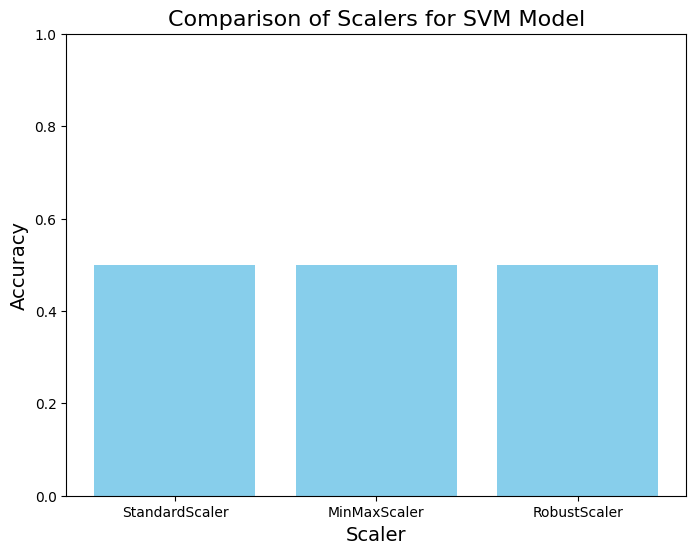

In [443]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#

# Các scaler
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scaler_names = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
accuracies = []

# Thử từng scaler và tính độ chính xác
for scaler in scalers:
    # Chuẩn hóa dữ liệu
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Huấn luyện mô hình
    model = SVC(kernel='rbf')
    model.fit(X_train_scaled, y_train)
    
    # Dự đoán và tính độ chính xác
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Vẽ biểu đồ so sánh độ chính xác của các scaler
plt.figure(figsize=(8, 6))
plt.bar(scaler_names, accuracies, color='skyblue')
plt.xlabel('Scaler', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Scalers for SVM Model', fontsize=16)
plt.ylim(0, 1)  # Đặt giới hạn cho trục y từ 0 đến 1
plt.show()


### SVC

In [444]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ("prep",  pre),                            
    ("scale", StandardScaler()), # vẽ chart xem độ tương quan (nếu dữ liệu quá nhiều noise) | robust scaler: xem dữ liệu
    ("svm",   SVC(probability=True, class_weight="balanced"))
])

pipe


,steps,"[('prep', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('hour_xy', ...), ('day_ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [445]:

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.1],
    'svm__kernel': ['rbf']
}
grid = GridSearchCV(pipe, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]


,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svm__C': [0.1, 1, ...], 'svm__gamma': ['scale', 0.01, ...], 'svm__kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('hour_xy', ...), ('day_ohe', ...)]"


In [446]:

#Xgboost 
print("Best params:", grid.best_params_)
print("Best cross-val acc:", grid.best_score_)

Best params: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-val acc: nan


In [447]:
from sklearn.metrics import accuracy_score,confusion_matrix


best_pipe = grid.best_estimator_
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy của mô hình là: {accuracy * 100:.2f}%')
print("Test score:", best_pipe.score(X_test, y_test))


[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]
[-0.8660254  0.5      ] [-0.5        0.8660254]
Accuracy của mô hình là: 50.00%
[-0.8660254  0.5      ] [-0.5        0.8660254]
Test score: 0.5


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# Logistic

In [448]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [449]:
pipe = Pipeline([
    ("prep", pre), 
    ("scale", StandardScaler()),  # Scaling cho dữ liệu
    ("logreg", LogisticRegression(class_weight="balanced", max_iter=1000))  
])
param_grid = [
    {"logreg__C": [0.1, 1, 10], "logreg__penalty": ["l2"], "logreg__solver": ["liblinear"]},
    {"logreg__C": [0.1, 1, 10], "logreg__penalty": ["l1"], "logreg__solver": ["liblinear"]},
]

grid = GridSearchCV(pipe, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Use

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"[{'logreg__C': [0.1, 1, ...], 'logreg__penalty': ['l2'], 'logreg__solver': ['liblinear']}, {'logreg__C': [0.1, 1, ...], 'logreg__penalty': ['l1'], 'logreg__solver': ['liblinear']}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('hour_xy', ...), ('day_ohe', ...)]"


In [453]:
print("Best params:", grid.best_params_)
print("Best cross-val acc:", grid.best_score_)

Best params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-val acc: 0.8888888888888888


In [450]:
best_pipe = grid.best_estimator_
best_pipe.fit(X_train, y_train)

[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]


,steps,"[('prep', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('hour_xy', ...), ('day_ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [451]:
print("Test score:", best_pipe.score(X_test, y_test))
print("Thực tế:", y_test.iloc[:5].values)
print("Dự đoán:", best_pipe.predict(X_test[:5]))

[-0.8660254  0.5      ] [-0.5        0.8660254]
Test score: 0.5
Thực tế: [0 1]
[-0.8660254  0.5      ] [-0.5        0.8660254]
Dự đoán: [1 1]


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# Random Forest Classifier

In [454]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có dữ liệu X_train, y_train

# Chuẩn bị pipeline với Random Forest thay vì SVM
pipe = Pipeline([
    ("prep", pre),  # preprocessing step (giả sử bạn đã chuẩn bị step 'pre')
    ("scale", StandardScaler()),  # Scaling cho dữ liệu
    ("rf", RandomForestClassifier(class_weight="balanced"))  # Thay SVM bằng Random Forest
])

# Cấu hình param_grid cho GridSearchCV
param_grid = [
    {"rf__n_estimators": [100, 200], "rf__max_depth": [None, 10, 20], "rf__min_samples_split": [2, 5]},
]

grid = GridSearchCV(pipe, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best cross-val acc:", grid.best_score_)


# Đánh giá mô hình tốt nhất
best_pipe = grid.best_estimator_
best_pipe.fit(X_train, y_train)

# In kết quả
print("Test score:", best_pipe.score(X_test, y_test))
print("Thực tế:", y_test.iloc[:5].values)
print("Dự đoán:", best_pipe.predict(X_test[:5]))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]
Best params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-val acc: 0.8888888888888888
[ 8.66025404e-01  2.58819045e-01  9.65925826e-01  9.65925826e-01
  8.66025404e-01 -8.66025404e-01  1.19434012e-15 -2.58819045e-01
 -2.58819045e-01] [ 0.5        -0.96592583  0.25881905  0.25881905  0.5        -0.5
  1.          0.96592583  0.96592583]
[-0.8660254  0.5      ] [-0.5        0.8660254]
Test score: 0.5
Thực tế: [0 1]
[-0.8660254  0.5      ] [-0.5        0.8660254]
Dự đoán: [1 1]


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
